# MaPro 2 Project 1 - Numerical Integration
by Katharina Fritzler and Ralf Wiegand
### 1) Libraries

In [1]:
# To use for functions to test the different quadratures on:
import numpy as np

# To plot:
import matplotlib.pyplot as plt

### 2) Getting Derivatives (Extension)

In [2]:
### Function that calculates derivatives (extension):

def func_calc(f, n, x):
    """
    Calculates either the function value for the given x or its n-th derivative for the given x.
    
    Arguments:
    f (function): A function of a single variable. Please read 'Important Note on the Input'.
    n (int): Degree of the derivative. Takes only the following integers: {0, 2, 4, 6} as no other derivatives are needed for the script. 
    x (float): x-value for evaluating the function.
    
    Returns:
    The function value or its n-th derivative for the given x.

    Important Note on the Input:
    There are two ways of choosing a function as an argument for func_calc:
        1) You can use the numpy-library for commomly used functions, like numpy.sin. For the exp(x)-function, it is advisable to use the
           numpy library to eliminate rounding errors. See an example for this:
           >>>> name_of_your_variable = np.exp()
        2) Please define a function for simple/custom functions (like $x^2$). See an example for this:
           >>>> def name_of_your_function(x):
           >>>>    return x**2

    Note:
    This function was implemented by Katharina Fritzler.
    """

    # Optimal increment, otherwise the rounding error of the computer is too large:
    dx = 0.02

    # Ordinary central difference quotients are calculated:
    if n == 0:
        result = f(x)
    elif n == 2:
        result = (f(x + dx)-2*f(x)+f(x - dx))/(dx**2)
    elif n == 4:
        result = (f(x+2*dx)-4*f(x+dx)+6*f(x)-4*f(x-dx)+f(x-2*dx))/(dx**4)
    elif n == 6:
        result = (f(x+3*dx)-6*f(x+2*dx)+15*f(x+dx)-20*f(x)+15*f(x-dx)-6*f(x-2*dx)+f(x-3*dx))/(dx**6)
    else:
        result = 'Wrong arguments. See documentation of func_calc() for help.'

    # Special case for the exp(x)-function:
    if f == np.exp:
        result = f(x)

    return result

In [3]:
# Example of calling up the documentation for a function:
help(func_calc)

Help on function func_calc in module __main__:

func_calc(f, n, x)
    Calculates either the function value for the given x or its n-th derivative for the given x.
    
    Arguments:
    f (function): A function of a single variable. Please read 'Important Note on the Input'.
    n (int): Degree of the derivative. Takes only the following integers: {0, 2, 4, 6} as no other derivatives are needed for the script. 
    x (float): x-value for evaluating the function.
    
    Returns:
    The function value or its n-th derivative for the given x.
    
    Important Note on the Input:
    There are two ways of choosing a function as an argument for func_calc:
        1) You can use the numpy-library for commomly used functions, like numpy.sin. For the exp(x)-function, it is advisable to use the
           numpy library to eliminate rounding errors. See an example for this:
           >>>> name_of_your_variable = np.exp()
        2) Please define a function for simple/custom functions (like

### 3) Midpoint Rule

In [4]:
def composite_midpoint_rule(f, a, b, M):
    """
    Approximates the integral of a function using the Composite Midpoint Rule.

    Arguments:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals to divide [a, b] into.

    Returns:
    float: The approximate value of the integral of f from a to b.

    Note:
    This function was implemented by Ralf Wiegand.
    """
    
    ### Instantiating variables:
    
    h = (b-a)/M
    total_area = 0
    
    ### Calculating the sum:

    for i in range(1, M+1):
        x_i = a+(2*i-1)*h/2
        total_area += h*f(x_i)
    
    return total_area

In [5]:
def midpoint_error(f, a, b, M):
    """
    Estimates the error of the Composite Midpoint Rule for numerical integration.

    Parameters:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals used in the Composite Midpoint Rule.

    Returns:
    float: The estimated error of the Composite Midpoint Rule.

    Note:
    This function was implemented by Katharina Fritzler
    """
    
    ### Instantiating variables:
    
    h = (b-a)/M
    # Taking 10 values from the interval. To make it more accuracte, increase the number:
    eps = np.linspace(a, b, 10)
    der_func_eval = func_calc(f, 2, eps)
    
    ### Calculating the error:
    
    coeff = -((b-a)/24)*(h**2)
    error = coeff*der_func_eval
    # The biggest error is chosen from the ten values:
    error = np.max(abs(error))
    
    return error

### 4) Trapezoidal Rule

In [6]:
def composite_trapezoidal_rule(f, a, b, M):
    """
    Approximates the integral of a function using the Composite Trapezoidal Rule.

    Arguments:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals to divide [a, b] into.

    Returns:
    float: The approximate value of the integral of f from a to b.

    Note:
    This function was implemented by Ralf Wiegand.
    """

    ### Instantiating variables:
    
    h = (b-a)/M
    total_area = 0
    
    ### Calculating the sum:

    for i in range(1, M+1):
        x_i = a + i*h
        summ = f(x_i)
        total_area += summ
    
    return (h/2)*(f(a)+2*total_area+f(b))

In [7]:
def trapezoidal_error(f, a, b, M):
    """
    Estimates the error of the Composite Trapezoidal Rule for numerical integration.

    Parameters:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals used in the Composite Trapezoidal Rule.

    Returns:
    float: The estimated error of the Composite Midpoint Rule.

    Note:
    This function was implemented by Katharina Fritzler
    """

    ### Instantiating variables:

    h = (b-a)/M
    # Taking 10 values from the interval. To make it more accuracte, increase the number:
    eps = np.linspace(a, b, 10)
    der_func_eval = func_calc(f, 2, eps)
    
    ### Calculating the error:

    coeff = -((b-a)/12)*(h**2)
    error = coeff*der_func_eval
    # The biggest error is chosen from the ten values:
    error = np.max(abs(error))
    
    return error

### 5) Simpson's Rule

In [8]:
def simpsons_rule(f, a, b, M):
    """
    Approximates the integral of a function using the Composite Simpson's Rule.

    Arguments:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals to divide [a, b] into.

    Returns:
    float: The approximate value of the integral of f from a to b.

    Note:
    This function was implemented by Katharina Fritzler.
    """

    ### Instantiating variables:

    h = (b - a) / M
    sum1 = 0
    sum2 = 0

    ### Calculating the sums:

    for k in range(2, 2*M, 2):
        x_k = a + h * k / 2
        sum1 += f(x_k)
    sum1 *= 2
    for s in range(1, 2*M, 2):
        x_s = a + h * s / 2
        sum2 += f(x_s)
    sum2 *= 4
    sum = f(a) + f(b) + sum1 + sum2
    
    return sum*h/6

In [9]:
def simpsons_error(f, a, b, M):
    """
    Estimates the error of the Composite Simpson's Rule for numerical integration.

    Parameters:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals used in the Composite Trapezoidal Rule.

    Returns:
    float: The estimated error of the Composite Midpoint Rule.

    Note:
    This function was implemented by Ralf Wiegand.
    """

    ### Instantiating variables:
    
    h = (b-a)/M
    # Taking 10 values from the interval. To make it more accuracte, increase the number:
    eps = np.linspace(a, b, 10)
    der_func_eval = func_calc(f, 4, eps)
    
    ### Calculating the error:

    coeff = -((b-a)/180)*((h/2)**4)
    error = coeff*der_func_eval
    # The biggest error is chosen from the ten values:
    error = np.max(abs(error))
    
    return error

### 6) Milne's Rule

In [10]:
def composite_milne_rule(f, a, b, M):
    """
    Approximates the integral of a function using the Composite Milne's Rule.

    Arguments:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals to divide [a, b] into.

    Returns:
    float: The approximate value of the integral of f from a to b.

    Note:
    This function was implemented by Katharina Fritzler.
    """
    ### Instantiating variables:

    h = (b-a)/M
    x_l = a
    x_r = a + h
    total_area = 0
    
    ### Calculating the sum:
    
    for ss in range(M):
        total_area += ((x_r - x_l)/90)*(7*f(x_l)+32*f((3*x_l+x_r)/4)+12*f((x_l+x_r)/2)+32*f((x_l+3*x_r)/4)+7*f(x_r))
        x_l += h
        x_r += h
    return total_area

In [11]:
def milne_error(f, a, b, M):
    """
    Estimates the error of the Composite Milne's Rule for numerical integration.

    Parameters:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals used in the Composite Trapezoidal Rule.

    Returns:
    float: The estimated error of the Composite Midpoint Rule.

    Note:
    This function was implemented by Ralf Wiegand.
    """

    ### Instantiating variables:

    h = (b-a)/M
    # Taking 10 values from the interval. To make it more accuracte, increase the number:
    eps = np.linspace(a, b, 10)
    der_func_eval = func_calc(f, 6, eps)

    ### Calculating the error:
    
    coeff = -2*(b-a)/945*((h/4)**6)
    error = coeff*der_func_eval
    # The biggest error is chosen from the ten values:
    error = np.max(abs(error))
    return error

### 7) Gauss' Rule with n = 1 (Extension)

In [12]:
### Composite Gauss quadrature with 2 support points (extension):

def gauss_1(f, a, b, M):
    """
    Approximates the integral of a function using the Composite Gauss's Rule with 2 support points (polynomial degree n=1).

    Arguments:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals to divide [a, b] into.

    Returns:
    float: The approximate value of the integral of f from a to b.

    Note:
    This function was implemented by Katharina Fritzler.
    """

    ### Instantiating variables:

    # x-values:
    x = np.zeros(2)
    # weights:
    w = np.zeros(2)
    # support points:
    t = np.zeros(2)
    
    w[0] = 1
    w[1] = 1
    t[0] = -1/np.sqrt(3)
    t[1] = 1/np.sqrt(3)
    
    h = (b-a)/M
    sum = 0
    
    # left border of interval:
    x_l = a
    # right border of interval:
    x_r = a + h
    
    for jj in range(M):
        x[0] = (x_l+x_r)/2 + (x_r-x_l)*t[0]/2
        x[1] = (x_l+x_r)/2 + (x_r-x_l)*t[1]/2
        for ii in range(2):
            sum += h*w[ii]*f(x[ii])/2
        x_l += h
        x_r += h

    return sum
    

In [13]:
### Composite Gauss quadrature error with 2 support points (extension):

def gauss_1_error(f, a, b, M):
    """
    Estimates the error of the Composite Gauss's Rule with 2 support points (polynomial degree n=1) for numerical integration.

    Parameters:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals used in the Composite Trapezoidal Rule.

    Returns:
    float: The estimated error of the Composite Midpoint Rule.

    Note:
    This function was implemented by Ralf Wiegand.
    """

    ### Instantiating variables:
    
    gamma_1 = (1/4320)
    h = (b-a)/M
    error = 0
    # left border of interval:
    x_l = a
    # right border of interval:
    x_r = a + h
    
    ### Calculating the error:
    
    for ii in range(M):
        eps = np.linspace(x_l, x_r, 10)
        func = f(eps)
        tmp = np.max(abs(func))
        error += abs(tmp)
        x_l += h
        x_r += h

    return error*gamma_1*(h**5)

### 8) Gauss' Rule with n = 2 (Extension)

In [14]:
### Composite Gauss quadrature with 3 support points (extension):

def gauss_2(f, a, b, M):
    """
    Approximates the integral of a function using the Composite Gauss's Rule with 3 support points (polynomial degree n=2).

    Arguments:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals to divide [a, b] into.

    Returns:
    float: The approximate value of the integral of f from a to b.

    Note:
    This function was implemented by Ralf Wiegand.
    """

    ### Instantiating variables:

    # weights:
    w = np.zeros(3)
    # support points:
    t = np.zeros(3)
    # x-values:
    x = np.zeros(3)
    
    w[0] = 5/9
    w[1] = 8/9
    w[2] = 5/9
    t[0] = -np.sqrt(3/5)
    t[1] = 0
    t[2] = np.sqrt(3/5)
    
    h = (b-a)/M
    sum = 0
    # left border of interval:
    x_l = a
    # right border of interval:
    x_r = a + h

    ### Calculating the sum:

    for jj in range(M):
        x[0] = (x_l+x_r)/2 + (x_r-x_l)*t[0]/2
        x[1] = (x_l+x_r)/2 + (x_r-x_l)*t[1]/2
        x[2] = (x_l+x_r)/2 + (x_r-x_l)*t[2]/2
        for ii in range(3):
            sum += h*w[ii]*f(x[ii])/2
        x_l += h
        x_r += h

    return sum

In [15]:
### Composite Gauss quadrature error with 3 support points (extension):

def gauss_2_error(f, a, b, M):
    """
    Estimates the error of the Composite Gauss's Rule with 3 support points (polynomial degree n=2) for numerical integration.

    Parameters:
    f (function): The integrand, a function of a single variable.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    M (int): The number of subintervals used in the Composite Trapezoidal Rule.

    Returns:
    float: The estimated error of the Composite Midpoint Rule.

    Note:
    This function was implemented by Katharina Fritzler.
    """

    ### Instantiating variables:
    
    gamma_2 = (1/2016000)
    h = (b-a)/M
    error = 0
    # left border of interval:
    x_l = a
    # right border of interval:
    x_r = a + h
    
    ### Calculating the sum:

    for ii in range(M):
        eps = np.linspace(x_l, x_r, 10)
        func = f(eps)
        tmp = np.max(abs(func))
        error += abs(tmp)
        x_l += h
        x_r += h

    return error*gamma_2*(h**7)

### 9) Getting the data

In [16]:
### Getting the data (this code block was implemented by Ralph Wiegand)

# Define the function that the different quadratures are tested on.
# See the documentation of func_calc() to see how you can define an example function.
ex_func = np.exp

# Choose interval:
a = -1
b = 1

# Choose the amount of sub-intervals:
M_values = []
for ll in range(9):
    M_values.append(2**ll)

### The errors:

# Instantiate lists, that will hold the results of the errors:
midpoint_errors = []
trapezoidal_errors = []
simpsons_errors = []
milne_errors = []
gauss_1_errors = []
gauss_2_errors = []

### The areas (extension):

# Instantiate lists, that will hold the results of the areas:
midpoint_areas = []
trapezoidal_areas = []
simpsons_areas = []
milne_areas = []
gauss_1_areas = []
gauss_2_areas = []

# Fill the lists using all the functions above:
for m in M_values:
    
    midpoint_errors.append(midpoint_error(ex_func, a, b, m))
    midpoint_areas.append(composite_midpoint_rule(ex_func, a, b, m))

    trapezoidal_errors.append(trapezoidal_error(ex_func, a, b, m))
    trapezoidal_areas.append(composite_trapezoidal_rule(ex_func, a, b, m))

    simpsons_errors.append(simpsons_error(ex_func, a, b, m))
    simpsons_areas.append(simpsons_rule(ex_func,  a, b, m))

    milne_errors.append(milne_error(ex_func, a, b, m))
    milne_areas.append(composite_milne_rule(ex_func, a, b, m))

    gauss_1_errors.append(gauss_1_error(ex_func, a, b, m))
    gauss_1_areas.append(gauss_1(ex_func, a, b, m))

    gauss_2_errors.append(gauss_2_error(ex_func, a, b, m))
    gauss_2_areas.append(gauss_2(ex_func, a, b, m))

### 10) Plotting the Errors

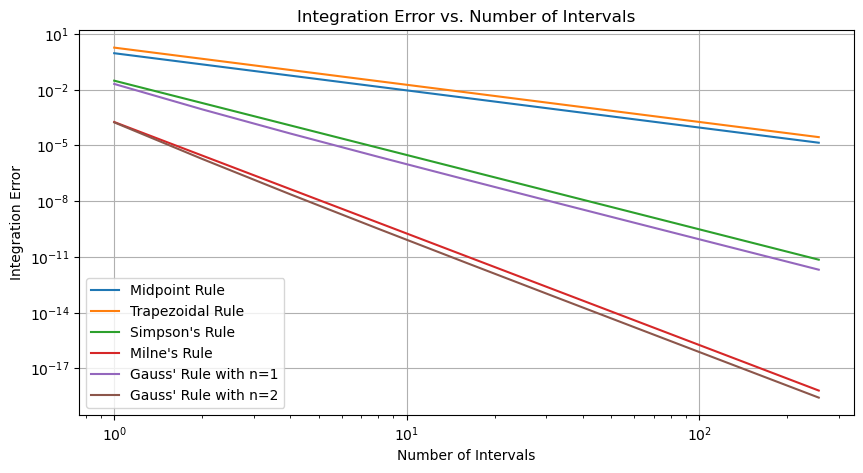

In [27]:
### Plotting the errors (implemented by Katharina Fritzler):

# Choose figure size:
plt.figure(figsize=(10, 5))
# Choose which lists to plot:
plt.plot(M_values, midpoint_errors, label='Midpoint Rule')
plt.plot(M_values, trapezoidal_errors, label='Trapezoidal Rule')
plt.plot(M_values, simpsons_errors, label="Simpson's Rule")
plt.plot(M_values, milne_errors, label="Milne's Rule")
# Extension:
plt.plot(M_values, gauss_1_errors, label="Gauss' Rule with n=1")
# Extension:
plt.plot(M_values, gauss_2_errors, label="Gauss' Rule with n=2")
# Logarithmic scales:
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of Intervals')
plt.ylabel('Integration Error')
plt.title('Integration Error vs. Number of Intervals')
plt.legend()
plt.grid(True)
plt.show()
# You can see that Milne's error has the steepest (negative)
# slope, which means that you need less sub-intervals when using Milne's
# rule to get an exact approximation of an integral.

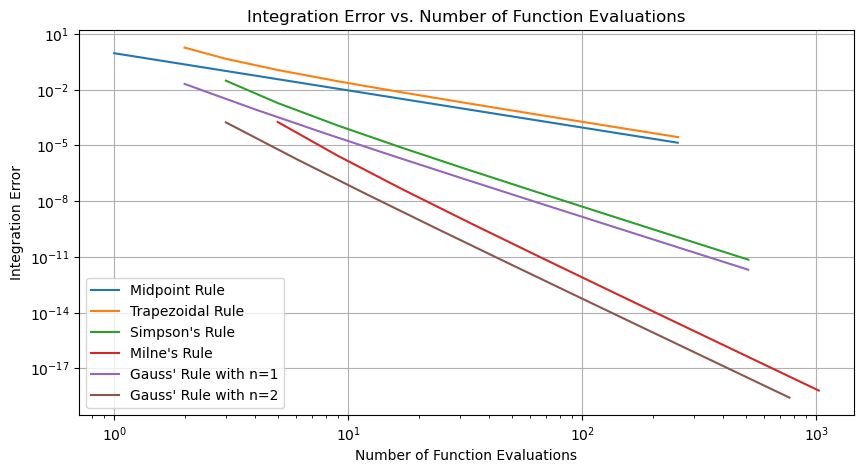

In [29]:
### Plotting errors against function evaluations (This block was implemented by Ralf Wiegand):

# Find out how many times a function is evaluated in the formula:
M_values_trap = [x + 1 for x in M_values]
M_values_simp = [2*x + 1 for x in M_values]
M_values_miln = [4*x + 1 for x in M_values]
M_values_gau1 = [2*x for x in M_values]
M_values_gau2 = [3*x for x in M_values]
# For the midpoint rule, M_values = number of function evaluations.

# Choose figure size:
plt.figure(figsize=(10, 5))
plt.plot(M_values, midpoint_errors, label='Midpoint Rule')
plt.plot(M_values_trap, trapezoidal_errors, label='Trapezoidal Rule')
plt.plot(M_values_simp, simpsons_errors, label="Simpson's Rule")
plt.plot(M_values_miln, milne_errors, label="Milne's Rule")
# Extension:
plt.plot(M_values_gau1, gauss_1_errors, label="Gauss' Rule with n=1")
# Extension:
plt.plot(M_values_gau2, gauss_2_errors, label="Gauss' Rule with n=2")
# Logarithmic scales:
plt.yscale('log')
plt.xscale('log')  
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Integration Error')
plt.title('Integration Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()
# It is very nice that you can see Gauss2 and Milne having (nearly)
# the same slope. They both exactly approximate integrals of polynomials
# with a degree of up to 5. Also, the amount of function evaluations
# corresponds to computational cost, which makes this chart very useful
# for choosing your preferred quadrature.

### 11) Plotting the Areas (Extension)

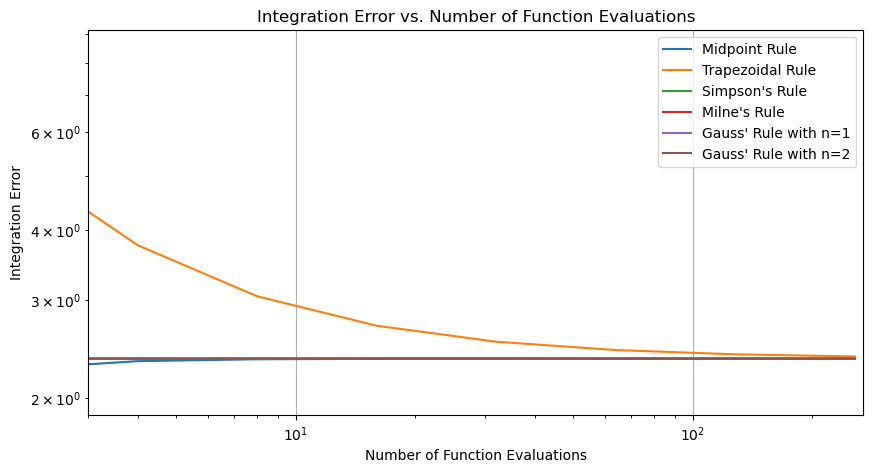

In [40]:
### Plotting the areas (This extension block was implemented by Ralf Wiegand):

# Choose the figure size:
# Choose figure size:
plt.figure(figsize=(10, 5))
plt.plot(M_values, midpoint_areas, label='Midpoint Rule')
plt.plot(M_values, trapezoidal_areas, label='Trapezoidal Rule')
plt.plot(M_values, simpsons_areas, label="Simpson's Rule")
plt.plot(M_values, milne_areas, label="Milne's Rule")
plt.xlim(3,)
# Extension:
plt.plot(M_values, gauss_1_areas, label="Gauss' Rule with n=1")
# Extension:
plt.plot(M_values, gauss_2_areas, label="Gauss' Rule with n=2")
# Logarithmic scales:
plt.yscale('log')
plt.xscale('log')  
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Integration Error')
plt.title('Integration Error vs. Number of Function Evaluations')
plt.legend()
plt.grid(True)
plt.show()
# Simpson, Milne, Gauss1 and Gauss2 are indistinguishable in this plot.

Text(0, 0.5, 'Integration Error')

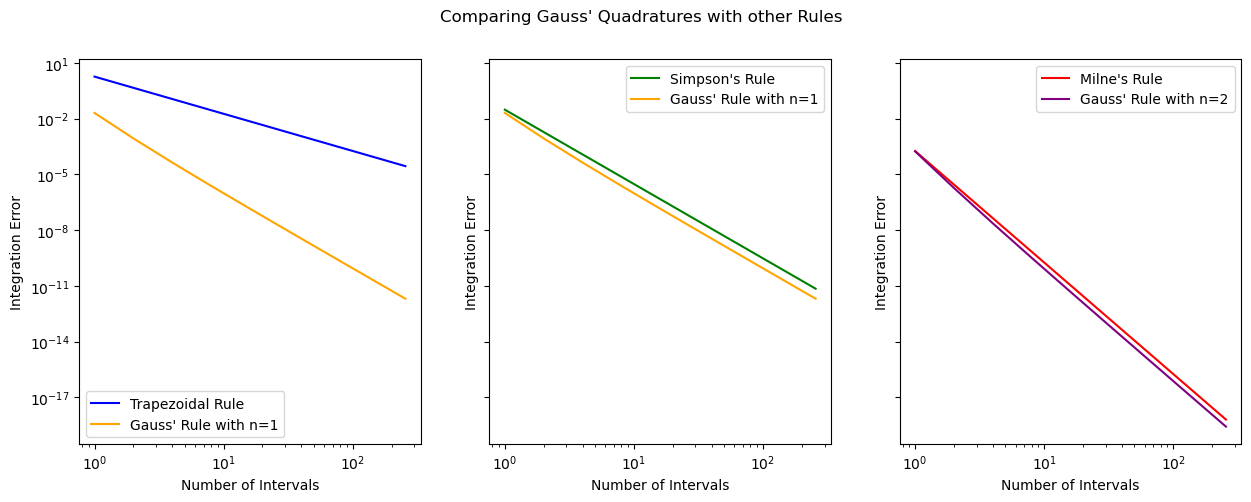

In [61]:
### Plotting the errors in comparison to the Gauss quadratures (This extension block was implemented by Katharina Fritzler):

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 5))

fig.suptitle("Comparing Gauss' Quadratures with other Rules")

ax1.plot(M_values, trapezoidal_errors, label='Trapezoidal Rule', color='blue')
ax1.plot(M_values, gauss_1_errors, label="Gauss' Rule with n=1", color='orange')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.set_xlabel('Number of Intervals')
ax1.set_ylabel('Integration Error')

ax2.plot(M_values, simpsons_errors, label="Simpson's Rule", color='green')
ax2.plot(M_values, gauss_1_errors, label="Gauss' Rule with n=1", color='orange')
ax2.legend()
ax2.set_xlabel('Number of Intervals')
ax2.set_ylabel('Integration Error')

ax3.plot(M_values, milne_errors, label="Milne's Rule", color='red')
ax3.plot(M_values, gauss_2_errors, label="Gauss' Rule with n=2", color='purple')
ax3.legend()
ax3.set_xlabel('Number of Intervals')
ax3.set_ylabel('Integration Error')

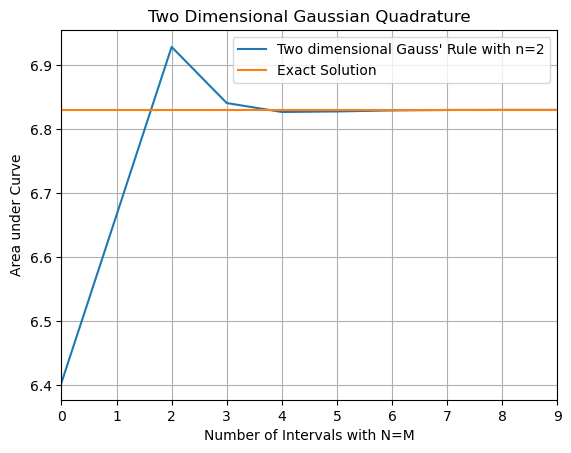

In [89]:
### Adapting to 2 dimensional functions (This extension block was implemented by Katharina Fritzler):

def gauss_2_2D(f, a, b, c, d, M, N):
    """
    Computes the two-dimensional integration of a function f over a rectangle 
    [a, b] x [c, d] using Gaussian quadrature.

    Parameters:
    f (function): The function to be integrated, which takes two arguments x and y.
    a (float): Left boundary of the integration range in the x-direction.
    b (float): Right boundary of the integration range in the x-direction.
    c (float): Lower boundary of the integration range in the y-direction.
    d (float): Upper boundary of the integration range in the y-direction.
    M (int): Number of subdivisions in the x-direction.
    N (int): Number of subdivisions in the y-direction.

    Returns:
    float: The approximated value of the integral.
    """
    
    # Initialize weights and nodes for 1D Gaussian quadrature with 3 points:
    w = np.zeros(3)
    t = np.zeros(3)
    x = np.zeros(3)
    y = np.zeros(3)
    w[0] = 5/9
    w[1] = 8/9
    w[2] = 5/9
    t[0] = -np.sqrt(3/5)
    t[1] = 0
    t[2] = np.sqrt(3/5)
    
    # Step sizes for the x and y directions:
    h = (b-a)/M
    p = (d-c)/N
    
    # Initialize temporary and summation variables:
    tmp = 0
    integral_sum = 0
    x_l = a
    x_r = a + h
    y_l = c
    y_r = c + p
    
    # Loop over the y-direction subdivisions:
    for kk in range(N):
        
        # Calculate the y-nodes for the current subdivision:
        y[0] = (y_l + y_r)/2 + (y_r - y_l) * t[0]/2
        y[1] = (y_l + y_r)/2 + (y_r - y_l) * t[1]/2
        y[2] = (y_l + y_r)/2 + (y_r - y_l) * t[2]/2
        
        # Loop over the x-direction subdivisions:
        for jj in range(M):
            
            # Calculate the x-nodes for the current subdivision:
            x[0] = (x_l + x_r)/2 + (x_r - x_l) * t[0]/2
            x[1] = (x_l + x_r)/2 + (x_r - x_l) * t[1]/2
            x[2] = (x_l + x_r)/2 + (x_r - x_l) * t[2]/2
            
            # Compute the sum of the function values weighted by Gaussian weights:
            for ii in range(3):
                for ll in range(3):
                    tmp += w[ll] * w[ii] * f(x[ii], y[ll])
            
            # Scale by the area of the current subdivision and add to the total sum:
            integral_sum += tmp * h * p / 4
            tmp = 0
            
            # Move to the next subdivision in the x-direction:
            x_l += h
            x_r += h
        
        # Move to the next subdivision in the y-direction:
        y_l += p
        y_r += p
        
        # Reset x-direction boundaries for the next y subdivision:
        x_l = a
        x_r = a + h

    return integral_sum

### Testing the function:

# Defining a 2D function:
def too_dee_func(x, y):
    return np.exp(np.sin(x**2)+y)

# Calculate result and fill list:
result = []
for aa in range(1,11):
    result.append(gauss_2_2D(too_dee_func, -2, 2, -0.5, 0.5, aa, aa))

# Save exact solution for this example:
exact_val = 6.8299

# Plot:
plt.plot(result, label="Two dimensional Gauss' Rule with n=2")
plt.plot([0, aa-1],[exact_val, exact_val], label='Exact Solution')
plt.xlim([0, aa-1])
plt.legend()
plt.xlabel("Number of Intervals with N=M")
plt.ylabel("Area under Curve")
plt.title("Two Dimensional Gaussian Quadrature")
plt.grid(True)